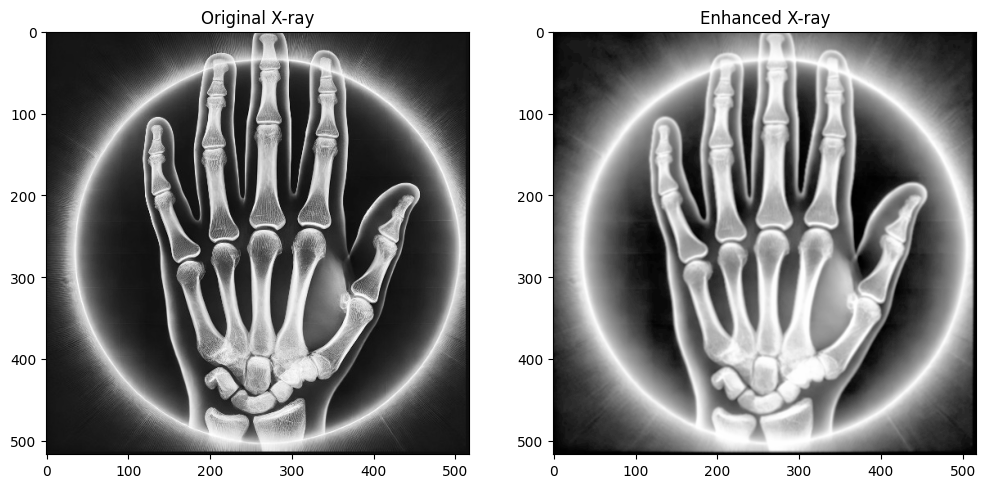

In [1]:
import numpy as np
import imageio.v2 as imageio  # Memastikan tidak ada peringatan deprecation
import matplotlib.pyplot as plt
from scipy import ndimage

# Memuat gambar X-ray
image = imageio.imread('/content/xrayy.jpg', mode='F')  # Membaca gambar dalam mode grayscale sebagai float

# Mengaplikasikan filter Gaussian untuk mengurangi noise
image_filtered = ndimage.gaussian_filter(image, sigma=1)

# Fungsi ekualisasi histogram
def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])  # Menghitung histogram
    cdf = hist.cumsum()  # Menghitung distribusi kumulatif (CDF)
    cdf_m = np.ma.masked_equal(cdf, 0)  # Masking nilai CDF yang nol untuk menghindari error
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Normalisasi CDF
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')  # Mengisi kembali nilai masked dengan 0
    return cdf_final[image.astype('uint8')]  # Menggunakan CDF untuk ekualisasi citra

# Mengaplikasikan ekualisasi histogram pada gambar yang telah difilter
image_equalized = histogram_equalization(image_filtered)

# Menampilkan gambar asli dan gambar yang telah ditingkatkan
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original X-ray')  # Judul untuk gambar asli
plt.imshow(image, cmap='gray')  # Menampilkan gambar asli
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title('Enhanced X-ray')  # Judul untuk gambar hasil peningkatan
plt.imshow(image_equalized, cmap='gray')  # Menampilkan gambar yang telah diekualisasi
plt.axis('on')

plt.show()
